<a href="https://colab.research.google.com/github/caua-braga-de-lima/housing_price_prediction_system/blob/master/HOUSING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#DATA DOWNLOAD:
import os
import tarfile
import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
  os.makedirs(housing_path, exist_ok=True)
  tgz_path = os.path.join(housing_path, "housing.tgz")
  urllib.request.urlretrieve(housing_url, tgz_path)
  housing_tgz = tarfile.open(tgz_path)
  housing_tgz.extractall(path=housing_path)
  housing_tgz.close()

fetch_housing_data()

In [2]:
#DATA LOADING:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
  csv_path = os.path.join(housing_path, "housing.csv")
  return pd.read_csv(csv_path)

housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
#DATA ANALYSIS AND VISUALIZATION:

#HOUSING INFORMATION
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
#HOUSING OCEAN PROXIMITY INFORMATION:
housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [5]:
#HOUSING STATISTICS:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


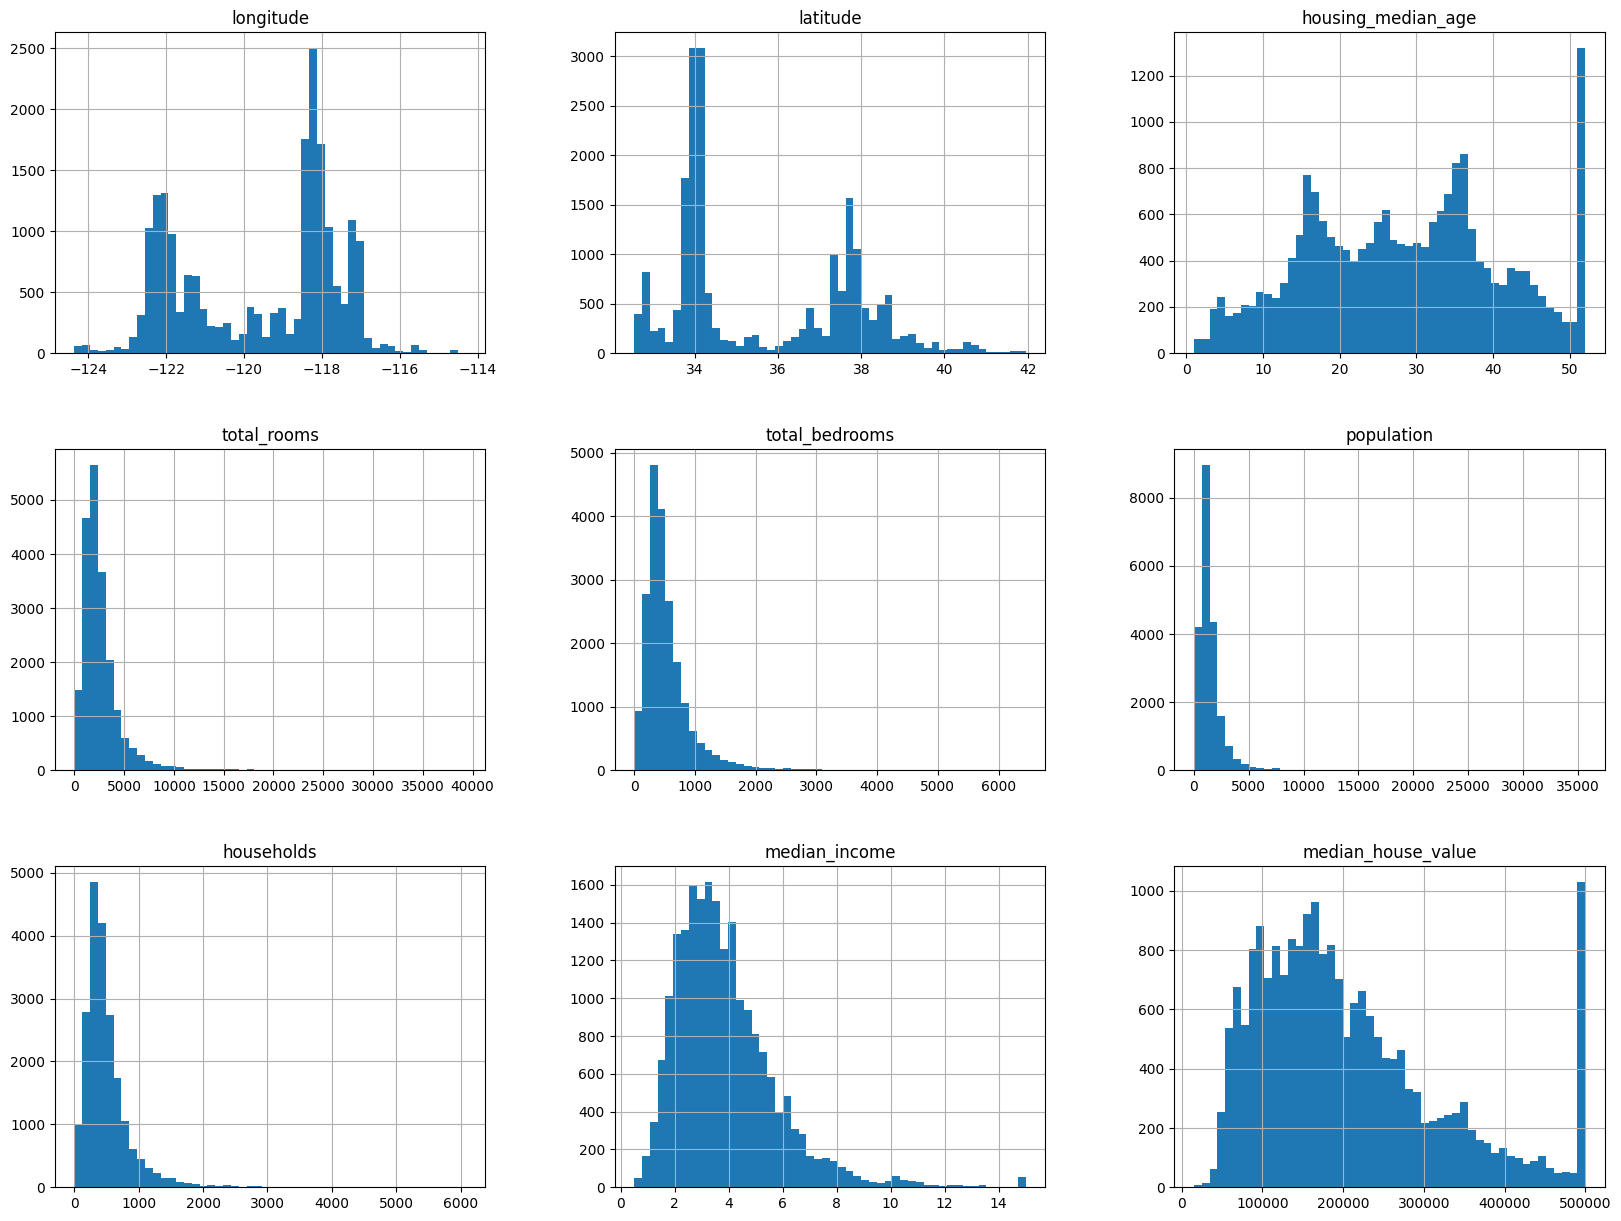

In [6]:
#HISTOGRAMS FOR EACH NUMERIC ATRIBUTE:
%matplotlib inline
import matplotlib.pyplot as plt

housing.hist(bins=50, figsize=(20,15))
plt.show()

In [7]:
#TEST SET SEPARATING:
import numpy as np
def split_train_test(data, test_ratio):
  shuffled_indices = np.random.permutation(len(data))
  test_set_size = int(len(data)*test_ratio)
  #SHUFFLE INDICES SO EVERY EXECUTION WE GET A DIFFERENT TEST SET:
  test_indices = shuffled_indices[:test_set_size]
  train_indices = shuffled_indices[test_set_size:]
  return data.iloc[train_indices], data.iloc[test_indices]

#SPLITTING DATA IN 80% AND 20% FOR TRAIN SET AND TEST SET RESPECTIVELY:
train_set, test_set = split_train_test(housing, 0.2)

<Axes: >

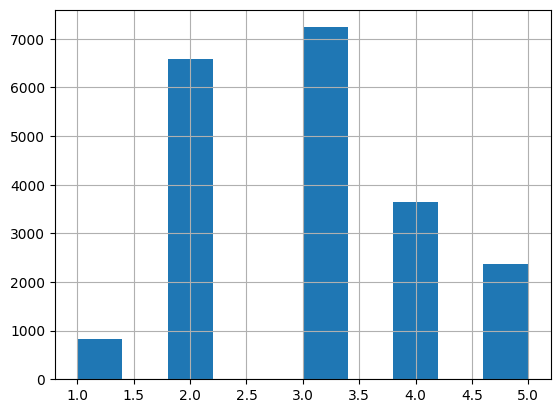

In [8]:
#MEDIAN_INCOME SPLITTING AND LABELING FOR RANDOMING ISSUES AND ANTI-BIAS DUE TO ITS DISTRIBUTION (STRATIFIED SHUFFLE SPLIT)
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins = [0., 1.5, 3.0, 4.5, 6, np.inf],
                               labels = [1, 2, 3, 4, 5])
#MEDIAN_INCOME LABELS HISTOGRAM:
housing["income_cat"].hist()

In [9]:
#STRATIFIED SHUFFLE SPLITTING:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
  strat_train_set = housing.loc[train_index]
  strat_test_set = housing.loc[test_index]

print(strat_test_set["income_cat"].value_counts() / len(strat_test_set))

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64


In [10]:
#RETURNING DATA TO ITS ORIGINAL STATE ON THE DATASET:
for set_ in (strat_train_set, strat_test_set):
  set_.drop("income_cat", axis=1, inplace=True)

In [11]:
#SEPARATING THE TRAIN SET TO MORE ANALYSIS AND MANIPULATION:
housing = strat_train_set.copy()

<Axes: xlabel='longitude', ylabel='latitude'>

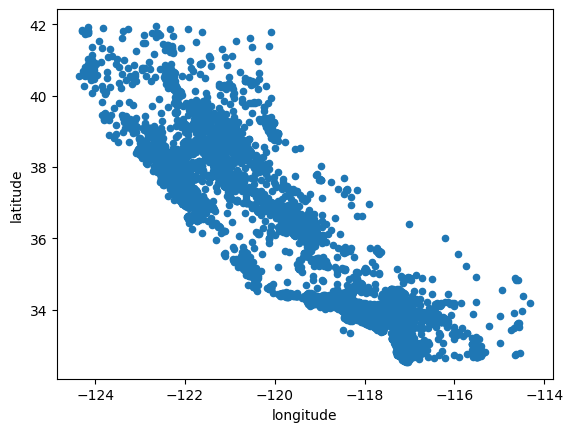

In [12]:
#VISUALIZING GEOGRAPHIC DATA WITH SCATTER PLOT:
housing.plot(kind="scatter", x = "longitude", y = "latitude")

<Axes: xlabel='longitude', ylabel='latitude'>

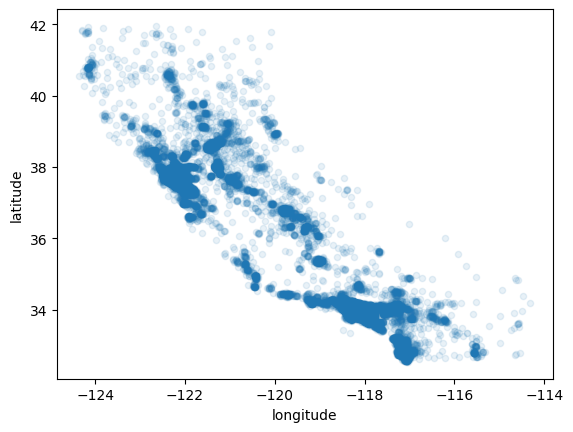

In [13]:
#SECOND VISUALIZATION SETTING ALPHA TO 0.1 (HIGH DENSITY AREAS HIGHLIGHTED)
housing.plot(kind="scatter", x = "longitude", y = "latitude", alpha = 0.1)

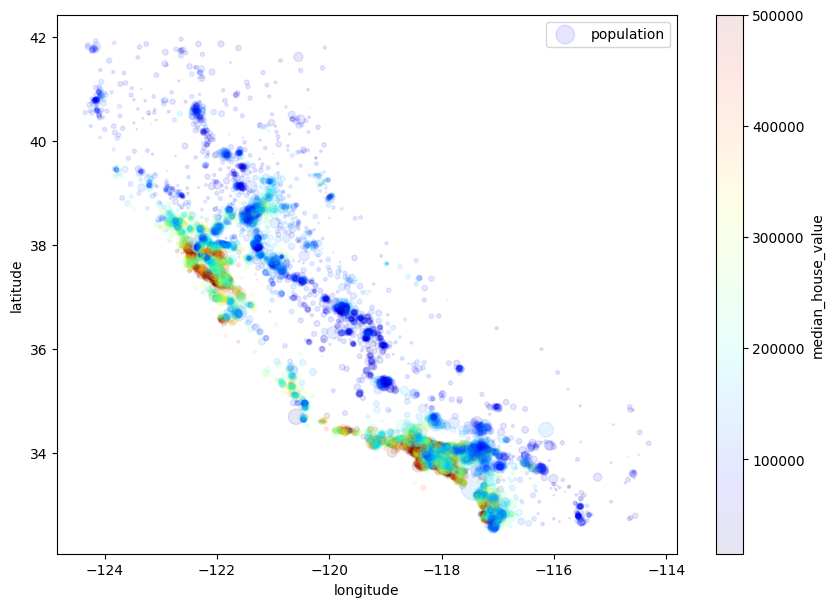

In [14]:
#THIRD VISUALIZATION INCLUDING PRICE AND POPULATION:
housing.plot(kind="scatter", x = "longitude", y = "latitude", alpha = 0.1,
             s=housing["population"]/100, label = "population", figsize=(10,7),
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,)
plt.legend()

In [15]:
#PLOTTING THE CORRELATION MATRIX: (LINEAR CORRELATION. CLOSE TO 1 - STRONG CORRELATION // CLOSE TO -1 - STRONG NEGATIVE CORRELATION)
corr_matrix = housing.select_dtypes(include=['number']).corr() # Select only numeric columns for correlation due to "ocean_proximity"object column.
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

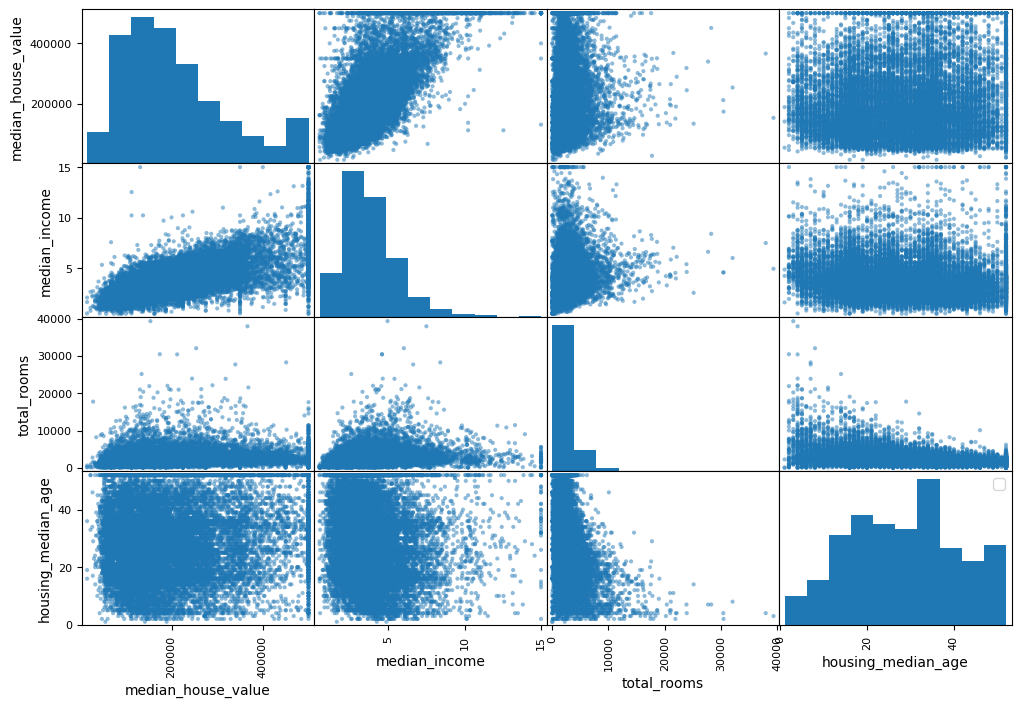

In [16]:
#PLOTTING THE SCATTER MATRIX:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12,8))

plt.legend()

In [17]:
#CREATING NEW FEATURES BASED ON THE OG FEATURES COMBINATIONS:
housing["rooms_per_households"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["population_per_household"] = housing["population"] / housing["households"]

In [18]:
#ANALYZING THE NEW CORRELATION MATRIX:
corr_matrix = housing.select_dtypes(include=['number']).corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687151
rooms_per_households        0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64

In [19]:
#DATA PRE-PROCESSING:
housing = strat_train_set.drop("median_house_value", axis=1) #REMOVING THE TARGET VECTOR
housing_labels = strat_train_set["median_house_value"].copy()

In [20]:
#FILLING THE NAN VALUES OF THE TOTAL_BEDROOM ATRIBUTE:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median") #FILL THE NAN VALUES WITH THE MEDIAN VALUE OF TOTAL_BEDROOMS
housing_num = housing.drop("ocean_proximity", axis=1) #REMOVING THE OCEAN_PROXIMITY COLUMN BEACUSE OF ITS NON-NUMERICAL VALUES
imputer.fit(housing_num)

#SEEING IF THE CALCULATED ATRIBUTES VALUES MATCH:
print(imputer.statistics_)
print(housing_num.median().values)

[-118.51      34.26      29.      2119.       433.      1164.
  408.         3.54155]
[-118.51      34.26      29.      2119.       433.      1164.
  408.         3.54155]


In [21]:
#APPLYING THE IMPUTER TO ALL ATRIBUTES SINCE WE'RE NOT SURE THERE'S NAN VALUES ON THE NEW DATA
X = imputer.transform(housing_num) #GIVES AN ARRAY
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index=housing_num.index) #STACKING IT INTO THE TRAIN SET

In [22]:
#MANIPULATING TEXT AND CATEGORY ATRIBUTES:
housing_cat = housing["ocean_proximity"]
housing_cat.head(10)

12655        INLAND
15502    NEAR OCEAN
2908         INLAND
14053    NEAR OCEAN
20496     <1H OCEAN
1481       NEAR BAY
18125     <1H OCEAN
5830      <1H OCEAN
17989     <1H OCEAN
4861      <1H OCEAN
Name: ocean_proximity, dtype: object

In [23]:
#CONVERTING THE CATEGORICAL LABELS TO NUMERICAL VALUES:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
unidimensional_housing_cat = housing_cat.values.reshape(-1,1)
housing_cat_encoded = ordinal_encoder.fit_transform(unidimensional_housing_cat)

#SEEING IF IT MATCHES:
print(housing_cat_encoded[:10])
print(unidimensional_housing_cat[:10])

[[1.]
 [4.]
 [1.]
 [4.]
 [0.]
 [3.]
 [0.]
 [0.]
 [0.]
 [0.]]
[['INLAND']
 ['NEAR OCEAN']
 ['INLAND']
 ['NEAR OCEAN']
 ['<1H OCEAN']
 ['NEAR BAY']
 ['<1H OCEAN']
 ['<1H OCEAN']
 ['<1H OCEAN']
 ['<1H OCEAN']]


In [24]:
#REPRESENTING THE OCEAN_PROXIMITY WITH ONE-HOT-ENCODING:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(unidimensional_housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [26]:
#CUSTOM TRANSFORMATOR TO ADD COMBINED ATRIBUTES:
from sklearn.base import BaseEstimator, TransformerMixin

#INIATILIZING HYPERPARAMETERS:
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

#DEFINING THE TRANSFORMATOR CLASS:
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):

  def __init__(self, add_bedrooms_per_room = True):
    self.add_bedrooms_per_room = add_bedrooms_per_room

  def fit(self, X, y=None):
    return self

  def transform(self, X, y=None):
    rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
    population_per_household = X[:, population_ix] / X[:, households_ix]
    if self.add_bedrooms_per_room:
      bedrooms_per_room = X[:, bedrooms_ix]/ X[:, rooms_ix]
      return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
    else:
      return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [27]:
#FEATURES SCALING:

#DATA TRANSFORMATION PIPELINE:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy = "median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [32]:
#APLYING THE TRANSFORMATION TO THE TEST SET:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs),
])

housing_prepared = full_pipeline.fit_transform(housing)

In [29]:
#TRAINING A LINEAR REGRESSION MODEL:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(housing_prepared, housing_labels)

LinearRegression()

In [31]:
#TESTING THE MODEL WITH SOME DATA:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", model.predict(some_data_prepared))
print("Labels:", list(some_labels))

Predictions: [ 85657.90192014 305492.60737488 152056.46122456 186095.70946094
 244550.67966089]
Labels: [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


In [33]:
#RMSE CALCULATION FOR THE MODEL WITH THE TRAIN SET:
from sklearn.metrics import mean_squared_error

housing_predictions = model.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68627.87390018745

In [34]:
#TRAINING A DECISION TREE REGRESSION MODEL:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0